PUNTO 1 LAB 3 INTERPOLACIÓN DE LAGRANGE 
PROBADA EN COLLAB 

4    0 0.4 0.8 1.2 cos(0) cos(0.4) cos(0.8) cos(1.2)   s   cos(x)   13 

INTERPOLACIÓN DE LAGRANGE GENERAL

Puede ingresar expresiones para x e y que tengan que ver con funciones como sin(x) cos(x) etc:


Ingrese todos los valores de x separados por comas o espacios:

Ingrese todos los valores de y separados por comas o espacios:

 Polinomio de Lagrange
x*(-2.16840434497101e-19*x**8 + 6.93889390390723e-18*x**7 - 3.5527136788005e-15*x**5 + 7.105427357601e-15*x**4 - 2.8421709430404e-14*x**3 + 1.13686837721616e-13*x**2 - 1.13686837721616e-13*x + 1.00000000000004)


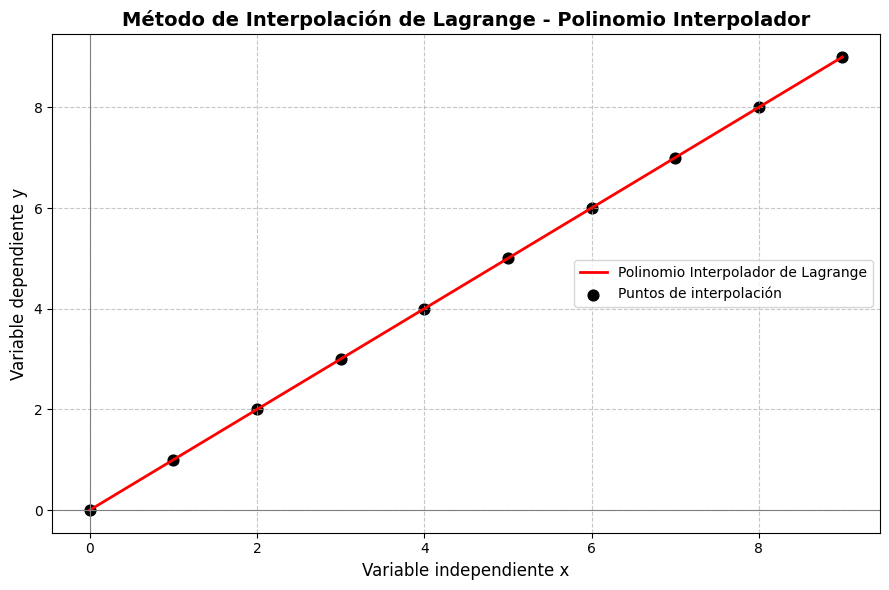


No se realizó comparación con función original.


In [2]:
# INTERPOLACIÓN DE LAGRANGE GENERAL

# Importación de librerías necesarias
import numpy as np                     # Biblioteca para cálculos numéricos (vectores, matrices, etc.)
import matplotlib.pyplot as plt        # Biblioteca para graficar funciones y datos
from sympy import symbols, sympify, simplify, expand, lambdify  # Herramientas simbólicas de Sympy

#1 Definir variable simbólica
x = symbols('x')                       # Define la variable simbólica 'x' para construir expresiones algebraicas

print("INTERPOLACIÓN DE LAGRANGE GENERAL")  # Mensaje informativo para el usuario
print("\nPuede ingresar expresiones para x e y que tengan que ver con funciones como sin(x) cos(x) etc:\n")

#2 Ingresar datos
n = int(input("Ingrese el número de puntos: "))   # Solicita al usuario el número de puntos a interpolar

# === NUEVO MÉTODO DE INGRESO DE DATOS ===
print("\nIngrese todos los valores de x separados por comas o espacios:")  # Mensaje de instrucción para ingreso de datos
x_inputs = input("x = ").replace(',', ' ').split()  # Lee los valores de x, reemplaza comas por espacios y separa en lista
print("\nIngrese todos los valores de y separados por comas o espacios:")  # Mensaje de instrucción para ingreso de datos
y_inputs = input("y = ").replace(',', ' ').split()  # Lee los valores de y, reemplaza comas por espacios y separa en lista

# Conversión de texto a números (acepta expresiones como sin(1), cos(2), etc.)
x_vals = [float(sympify(val)) for val in x_inputs]  # Convierte cada valor de x (que puede ser una expresión) a número
y_vals = [float(sympify(val)) for val in y_inputs]  # Convierte cada valor de y (que puede ser una expresión) a número

# Verificar cantidad de datos
if len(x_vals) != n or len(y_vals) != n:  # Comprueba si la cantidad de valores coincide con el número de puntos
    raise ValueError(" La cantidad de valores x e y no coincide con el número de puntos ingresado.")  # Lanza error si no coincide

# 3 Construcción del polinomio de Lagrange

# La fórmula general del polinomio de Lagrange es:
#        P(x) = Σ [ y_i * L_i(x) ]   para i = 0, 1, ..., n-1
# donde cada L_i(x) es un polinomio base definido como:
#        L_i(x) = ∏ [(x - x_j) / (x_i - x_j)]  para todos j ≠ i
# El principio matemático: cada L_i(x) vale 1 en x_i y 0 en los demás x_j,
# de modo que P(x_i) = y_i, garantizando que el polinomio pase por todos los puntos.

def lagrange_interpol(x_points, y_points):   # Define función para construir el polinomio interpolador de Lagrange
    n = len(x_points)                        # Número de puntos de interpolación
    P = 0                                    # Inicializa el polinomio total en cero
   
    # Bucle principal: construye cada polinomio base L_i(x)
    for i in range(n):                       # Recorre cada punto i para construir su polinomio base L_i(x)
        L_i = 1                              # Inicializa el producto L_i(x)

        # Segundo bucle: multiplica los factores (x - x_j)/(x_i - x_j) para todos j ≠ i
        for j in range(n):                   # Segundo bucle: recorre todos los puntos j ≠ i
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])  # Fórmula del polinomio base de Lagrange
                # Este producto construye el polinomio base L_i(x)
                # Propiedad que se cumple:
                # En x = x_i, L_i(x) = 1
                # En x = x_j (j ≠ i), L_i(x) = 0

        # Multiplica L_i(x) por el valor y_i y lo suma a P(x)  
        P += y_points[i] * L_i               # Suma el término correspondiente y_i * L_i(x)
    return simplify(P)                       # Simplifica la expresión final del polinomio y la retorna

P = lagrange_interpol(x_vals, y_vals)        # Llama a la función con los valores ingresados y obtiene el polinomio P(x)

print("\n Polinomio de Lagrange")           
print(P)                                     # Imprime el polinomio interpolador de Lagrange obtenido



#4 Comparación con la función original
opcion = input("\n¿Desea comparar con la función original? (s/n): ").lower()  # Pregunta si desea comparar con una función real

if opcion == 's':                           # Si la respuesta es 's' (sí)
    f_expr = input("Ingrese la función original, puede ser en términos de sen(x) cos(x) etc: ")  # Solicita la función original
    f = sympify(f_expr)                     # Convierte la cadena a una expresión simbólica

    # Convertir a funciones numéricas
    f_num = lambdify(x, f, 'numpy')         # Convierte f(x) simbólica a una función evaluable numéricamente
    P_num = lambdify(x, P, 'numpy')         # Convierte P(x) simbólica a una función evaluable numéricamente
    
    # Rango de graficación intervalo entre las muestras
    x_min, x_max = min(x_vals), max(x_vals) # Define el rango mínimo y máximo del eje X según los puntos dados
    densidad = int(input("Ingrese cuántos puntos desea evaluar (ej: 100): "))  # Pregunta cuántos puntos usar para graficar
    
    x_plot = np.linspace(x_min, x_max, densidad)  # Crea un arreglo de puntos equiespaciados en el rango definido
    y_real = f_num(x_plot)                        # Evalúa la función original en los puntos
    y_interp = P_num(x_plot)                      # Evalúa el polinomio interpolador en los mismos puntos
  
#GRAFICA

    plt.figure(figsize=(9, 6))                    # Crea una nueva figura con tamaño 9x6"
    
    # Curva de la función original
    plt.plot(x_plot, y_real, color='blue', linewidth=2, label=f"Función original: {f_expr}")  # Dibuja la función original en color azul
    
    # Curva del polinomio interpolador
    plt.plot(x_plot, y_interp, '--', color='red', linewidth=2, label="Polinomio Interpolador de Lagrange")  # Dibuja P(x) en color rojo y discontinua
    
    # Puntos de interpolación
    plt.scatter(x_vals, y_vals, color='black', zorder=5, s=60, label='Puntos de interpolación')  # Dibuja los puntos dados para la interpolación

    # --- REQUISITOS DE PRESENTACIÓN ---
    plt.title("Método de Interpolación de Lagrange - Comparación con función original", fontsize=14, fontweight='bold')  # Título de la gráfica
    plt.xlabel("$X$", fontsize=12)              # Etiqueta del eje X
    plt.ylabel("$f(x)$", fontsize=12)           # Etiqueta del eje Y
    plt.legend(fontsize=10, loc='best')         # Muestra leyenda de las curvas
    plt.grid(True, linestyle='--', alpha=0.7)   # Activa la cuadrícula con líneas punteadas
    plt.axhline(0, color='gray', linewidth=0.8) # Dibuja eje horizontal
    plt.axvline(0, color='gray', linewidth=0.8) # Dibuja eje vertical
    plt.tight_layout()                          # Ajusta márgenes automáticamente
    
    plt.show()                                  # Muestra la gráfica en pantalla
    
    # Calcular errores
    error_abs = np.abs(y_real - y_interp)       # Calcula el error absoluto entre función real e interpolada
    error_max = np.max(error_abs)               # Determina el error absoluto máximo
    error_prom = np.mean(error_abs)             # Calcula el error promedio
    
    # Tabla comparativa
    print("\n=== TABLA DE COMPARACIÓN ===")     # Título de la tabla
    print(f"{'x':>10} {'f(x)':>15} {'P(x)':>15} {'|Error|':>15}")  # Encabezado con formato
    for xi, fi, pi, ei in zip(x_plot, y_real, y_interp, error_abs):  # Recorre cada punto de evaluación
        print(f"{xi:10.5f} {fi:15.8f} {pi:15.8f} {ei:15.8f}")       # Muestra cada fila con valores alineados
    
    # Muestra resumen de errores
    print(f"\nError absoluto máximo: {error_max:.8f}")
    print(f"Error promedio: {error_prom:.8f}")

else:                                          # Si el usuario no desea comparar con una función original
    # Si no se compara con una función original, igual se muestra el polinomio interpolado
    P_num = lambdify(x, P, 'numpy')            # Convierte P(x) a función numérica
    x_min, x_max = min(x_vals), max(x_vals)    # Determina rango de graficación
    x_plot = np.linspace(x_min, x_max, 100)    # Genera 100 puntos de graficación
    y_interp = P_num(x_plot)                   # Evalúa el polinomio en esos puntos

    # Gráfica del polinomio únicamente
    plt.figure(figsize=(9, 6))                 # Crea nueva figura
    plt.plot(x_plot, y_interp, color='red', linewidth=2, label="Polinomio Interpolador de Lagrange")  # Dibuja el polinomio
    plt.scatter(x_vals, y_vals, color='black', s=60, label='Puntos de interpolación')  # Dibuja los puntos dados

    # --- REQUISITOS DE PRESENTACIÓN ---
    plt.title("Método de Interpolación de Lagrange - Polinomio Interpolador", fontsize=14, fontweight='bold')  # Título
    plt.xlabel("Variable independiente x", fontsize=12)  # Etiqueta eje X
    plt.ylabel("Variable dependiente y", fontsize=12)    # Etiqueta eje Y
    plt.legend(fontsize=10, loc='best')                  # Leyenda
    plt.grid(True, linestyle='--', alpha=0.7)            # Cuadrícula
    plt.axhline(0, color='gray', linewidth=0.8)          # Eje X
    plt.axvline(0, color='gray', linewidth=0.8)          # Eje Y
    plt.tight_layout()                                   # Ajuste de márgenes
    plt.show()                                           # Muestra la gráfica

    print("\nNo se realizó comparación con función original.")  # Mensaje final
